In [832]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score,accuracy_score

pd.set_option('display.max_columns',100)
pd.set_option('display.max_row',10000)



# read dataset as dataframe 

In [833]:
df=pd.read_csv('binary_classifier_data/training.csv',delimiter=';')
df.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,"17,92","5,4e-05",u,g,c,v,"1,75",f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,"16,92","3,35e-05",y,p,k,v,"0,29",f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,"31,25","0,0001125",u,g,ff,ff,0,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,"48,17","0,0001335",u,g,i,o,"0,335",f,f,0,f,g,0.0,120,0.0,NaN,0,no.
4,b,"32,33","0,00035",u,g,k,v,"0,5",f,f,0,t,g,232.0,0,2320000.0,f,0,no.


In [834]:
df.shape

(3700, 19)

In [835]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 19 columns):
variable1     3661 non-null object
variable2     3661 non-null object
variable3     3700 non-null object
variable4     3636 non-null object
variable5     3636 non-null object
variable6     3634 non-null object
variable7     3634 non-null object
variable8     3700 non-null object
variable9     3700 non-null object
variable10    3700 non-null object
variable11    3700 non-null int64
variable12    3700 non-null object
variable13    3700 non-null object
variable14    3600 non-null float64
variable15    3700 non-null int64
variable17    3600 non-null float64
variable18    1555 non-null object
variable19    3700 non-null int64
classLabel    3700 non-null object
dtypes: float64(2), int64(3), object(14)
memory usage: 549.3+ KB


In [836]:
df.describe()

,variable11,variable14,variable15,variable17,variable19
count,3700.000000,3600.000000,3700.000000,3.600000e+03,3700.000000
mean,4.160000,162.695000,2246.705946,1.626950e+06,0.925405
std,6.750553,156.045682,8708.571126,1.560457e+06,0.262772
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,0.000000e+00,1.000000
50%,2.000000,120.000000,113.000000,1.200000e+06,1.000000
75%,6.000000,280.000000,1059.750000,2.800000e+06,1.000000
max,67.000000,1160.000000,100000.000000,1.160000e+07,1.000000


In [837]:
df['variable2']=df['variable2'].str.replace(',','.')
df['variable3']=df['variable3'].str.replace(',','.')
df['variable8']=df['variable8'].str.replace(',','.')


In [838]:
df['variable2']=df['variable2'].astype('float64')
df['variable3']=df['variable3'].astype('float64')
df['variable8']=df['variable8'].astype('float64')

In [839]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 19 columns):
variable1     3661 non-null object
variable2     3661 non-null float64
variable3     3700 non-null float64
variable4     3636 non-null object
variable5     3636 non-null object
variable6     3634 non-null object
variable7     3634 non-null object
variable8     3700 non-null float64
variable9     3700 non-null object
variable10    3700 non-null object
variable11    3700 non-null int64
variable12    3700 non-null object
variable13    3700 non-null object
variable14    3600 non-null float64
variable15    3700 non-null int64
variable17    3600 non-null float64
variable18    1555 non-null object
variable19    3700 non-null int64
classLabel    3700 non-null object
dtypes: float64(5), int64(3), object(11)
memory usage: 549.3+ KB


In [840]:
df.classLabel.value_counts()
#showing that our data is not balanced 

yes.    3424
no.      276
Name: classLabel, dtype: int64

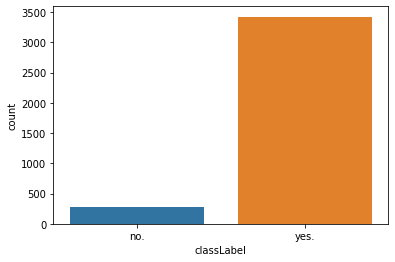

In [841]:
sns.countplot(x='classLabel',data=df)

# check for Missing Values In Train Data & Deal With it

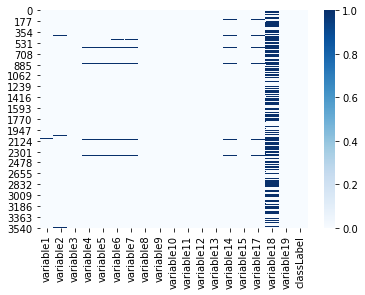

In [842]:
sns.heatmap(df.isnull(),cmap='Blues')

In [843]:
df.isnull().sum()

variable1       39
variable2       39
variable3        0
variable4       64
variable5       64
variable6       66
variable7       66
variable8        0
variable9        0
variable10       0
variable11       0
variable12       0
variable13       0
variable14     100
variable15       0
variable17     100
variable18    2145
variable19       0
classLabel       0
dtype: int64

In [844]:
df.fillna(method='pad',axis=0,inplace=True)


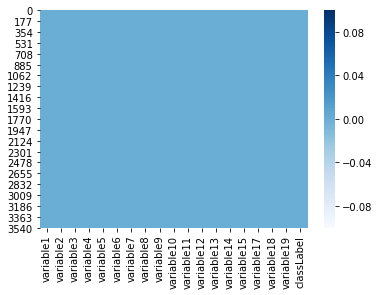

In [845]:
#recheck for missing values
sns.heatmap(df.isnull(),cmap='Blues')


In [846]:
df.isnull().sum()

variable1     0
variable2     0
variable3     0
variable4     0
variable5     0
variable6     0
variable7     0
variable8     0
variable9     0
variable10    0
variable11    0
variable12    0
variable13    0
variable14    0
variable15    0
variable17    0
variable18    0
variable19    0
classLabel    0
dtype: int64

# Data Preprocessing: Deal With Non_Numerical Data

In [847]:
col=df[['variable1', 'variable4', 'variable5', 'variable6' , 'variable7','variable9', 'variable10',
       'variable12', 'variable13', 'variable18','classLabel']]


In [848]:
label_encode=LabelEncoder()
new_df=col.apply(label_encode.fit_transform)

In [849]:
new_df.head()

,variable1,variable4,variable5,variable6,variable7,variable9,variable10,variable12,variable13,variable18,classLabel
0,0,1,0,2,7,0,1,1,0,1,0
1,1,2,2,9,7,0,0,0,2,1,0
2,1,1,0,6,2,0,1,0,0,1,0
3,0,1,0,7,6,0,0,0,0,1,0
4,1,1,0,9,7,0,0,1,0,0,0


In [850]:
#replace coiumns by new values afer encoding
df[['variable1', 'variable4', 'variable5', 'variable6' , 'variable7','variable9', 'variable10',
       'variable12', 'variable13', 'variable18','classLabel']]=new_df[['variable1', 'variable4', 'variable5', 'variable6' , 'variable7','variable9', 'variable10',
       'variable12', 'variable13', 'variable18','classLabel']]

In [851]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 19 columns):
variable1     3700 non-null int32
variable2     3700 non-null float64
variable3     3700 non-null float64
variable4     3700 non-null int32
variable5     3700 non-null int32
variable6     3700 non-null int32
variable7     3700 non-null int32
variable8     3700 non-null float64
variable9     3700 non-null int32
variable10    3700 non-null int32
variable11    3700 non-null int64
variable12    3700 non-null int32
variable13    3700 non-null int32
variable14    3700 non-null float64
variable15    3700 non-null int64
variable17    3700 non-null float64
variable18    3700 non-null int32
variable19    3700 non-null int64
classLabel    3700 non-null int32
dtypes: float64(5), int32(11), int64(3)
memory usage: 390.4 KB


# Load validation

In [852]:
df_val=pd.read_csv('binary_classifier_data/validation.csv',delimiter=';')
df_val.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,b,"32,33","0,00075",u,g,e,bb,"1,585",t,f,0,t,s,420.0,0,4200000.0,NaN,1,no.
1,b,"23,58","0,000179",u,g,c,v,"0,54",f,f,0,t,g,136.0,1,1360000.0,NaN,0,no.
2,b,"36,42","7,5e-05",y,p,d,v,"0,585",f,f,0,f,g,240.0,3,2400000.0,NaN,1,no.
3,b,"18,42","0,0010415",y,p,aa,v,"0,125",t,f,0,f,g,120.0,375,1200000.0,NaN,0,no.
4,b,"24,5","0,0013335",y,p,aa,v,"0,04",f,f,0,t,g,120.0,475,1200000.0,f,1,no.


In [853]:
df_val.shape

(200, 19)

In [854]:
df_val['variable2']=df_val['variable2'].str.replace(',','.')
df_val['variable3']=df_val['variable3'].str.replace(',','.')
df_val['variable8']=df_val['variable8'].str.replace(',','.')


In [855]:
df_val['variable2']=df_val['variable2'].astype('float64')
df_val['variable3']=df_val['variable3'].astype('float64')
df_val['variable8']=df_val['variable8'].astype('float64')

In [856]:
df_val.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,b,32.33,0.000750,u,g,e,bb,1.585,t,f,0,t,s,420.0,0,4200000.0,NaN,1,no.
1,b,23.58,0.000179,u,g,c,v,0.540,f,f,0,t,g,136.0,1,1360000.0,NaN,0,no.
2,b,36.42,0.000075,y,p,d,v,0.585,f,f,0,f,g,240.0,3,2400000.0,NaN,1,no.
3,b,18.42,0.001042,y,p,aa,v,0.125,t,f,0,f,g,120.0,375,1200000.0,NaN,0,no.
4,b,24.50,0.001334,y,p,aa,v,0.040,f,f,0,t,g,120.0,475,1200000.0,f,1,no.


In [857]:
df_val.classLabel.value_counts()
#showing that our data is not balanced 

no.     107
yes.     93
Name: classLabel, dtype: int64

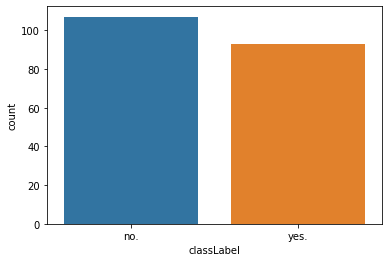

In [858]:
sns.countplot(x='classLabel',data=df_val)

  # Check for missing data in validationset

In [859]:
df_val.isnull().sum()

variable1       3
variable2       3
variable3       0
variable4       2
variable5       2
variable6       3
variable7       3
variable8       0
variable9       0
variable10      0
variable11      0
variable12      0
variable13      0
variable14      3
variable15      0
variable17      3
variable18    111
variable19      0
classLabel      0
dtype: int64

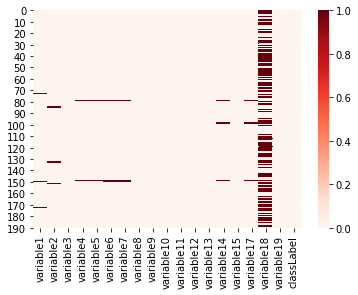

In [860]:
sns.heatmap(df_val.isnull(),cmap='Reds')

In [861]:
df_val.fillna(method='pad',axis=0,inplace=True)
df_val.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,b,32.33,0.000750,u,g,e,bb,1.585,t,f,0,t,s,420.0,0,4200000.0,NaN,1,no.
1,b,23.58,0.000179,u,g,c,v,0.540,f,f,0,t,g,136.0,1,1360000.0,NaN,0,no.
2,b,36.42,0.000075,y,p,d,v,0.585,f,f,0,f,g,240.0,3,2400000.0,NaN,1,no.
3,b,18.42,0.001042,y,p,aa,v,0.125,t,f,0,f,g,120.0,375,1200000.0,NaN,0,no.
4,b,24.50,0.001334,y,p,aa,v,0.040,f,f,0,t,g,120.0,475,1200000.0,f,1,no.
5,a,39.08,0.000400,u,g,c,v,3.000,f,f,0,f,g,480.0,0,4800000.0,f,0,no.
6,b,23.42,0.000100,u,g,c,v,0.500,f,f,0,t,s,280.0,0,2800000.0,f,1,no.
7,b,29.58,0.000475,u,g,m,v,2.000,f,t,1,t,g,460.0,68,4600000.0,t,0,no.
8,b,27.42,0.001250,u,g,aa,bb,0.250,f,f,0,t,g,720.0,0,7200000.0,f,1,no.
9,b,58.58,0.000271,u,g,c,v,2.415,f,f,0,t,g,320.0,0,3200000.0,f,0,no.


In [862]:
#to make sure that there are not any missing values
df_val.isnull().sum()

variable1     0
variable2     0
variable3     0
variable4     0
variable5     0
variable6     0
variable7     0
variable8     0
variable9     0
variable10    0
variable11    0
variable12    0
variable13    0
variable14    0
variable15    0
variable17    0
variable18    4
variable19    0
classLabel    0
dtype: int64

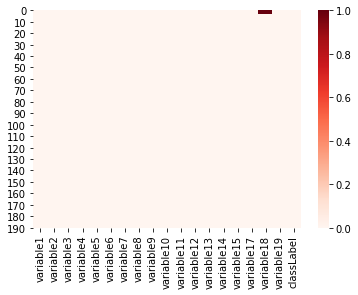

In [863]:
sns.heatmap(df_val.isnull(),cmap='Reds')

In [864]:
#Asshown thet filling data had fail with variable18 as first 4 record still nan
#we can drop them
df_val.dropna(inplace=True)
df.reindex().head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,0,17.92,0.000054,1,0,2,7,1.750,0,1,1,1,0,80.0,5,800000.0,1,0,0
1,1,16.92,0.000034,2,2,9,7,0.290,0,0,0,0,2,200.0,0,2000000.0,1,0,0
2,1,31.25,0.000112,1,0,6,2,0.000,0,1,1,0,0,96.0,19,960000.0,1,0,0
3,0,48.17,0.000133,1,0,7,6,0.335,0,0,0,0,0,0.0,120,0.0,1,0,0
4,1,32.33,0.000350,1,0,9,7,0.500,0,0,0,1,0,232.0,0,2320000.0,0,0,0


# Deal With Non_Numerical Data In Validation Set

In [865]:
col_val=df_val[['variable1', 'variable4', 'variable5', 'variable6' , 'variable7','variable9', 'variable10',
       'variable12', 'variable13', 'variable18','classLabel']]

In [866]:

new_df_val=col_val.apply(label_encode.fit_transform)
new_df_val.head()

,variable1,variable4,variable5,variable6,variable7,variable9,variable10,variable12,variable13,variable18,classLabel
4,1,1,1,1,6,0,0,1,0,0,0
5,0,0,0,2,6,0,0,0,0,0,0
6,1,0,0,2,6,0,0,1,2,0,0
7,1,0,0,10,6,0,1,1,0,1,0
8,1,0,0,1,0,0,0,1,0,0,0


In [867]:
#replace coiumns by new values afer encoding
df_val[['variable1', 'variable4', 'variable5', 'variable6' , 'variable7','variable9', 'variable10',
       'variable12', 'variable13', 'variable18','classLabel']]=new_df_val[['variable1', 'variable4', 'variable5', 'variable6' , 'variable7','variable9', 'variable10',
       'variable12', 'variable13', 'variable18','classLabel']]

In [868]:
# check that data type had changed
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 4 to 199
Data columns (total 19 columns):
variable1     196 non-null int32
variable2     196 non-null float64
variable3     196 non-null float64
variable4     196 non-null int32
variable5     196 non-null int32
variable6     196 non-null int32
variable7     196 non-null int32
variable8     196 non-null float64
variable9     196 non-null int32
variable10    196 non-null int32
variable11    196 non-null int64
variable12    196 non-null int32
variable13    196 non-null int32
variable14    196 non-null float64
variable15    196 non-null int64
variable17    196 non-null float64
variable18    196 non-null int32
variable19    196 non-null int64
classLabel    196 non-null int32
dtypes: float64(5), int32(11), int64(3)
memory usage: 22.2 KB


# Divide Data To Features X & classlabel y (Trainset)

In [869]:
X=np.array(df.drop(columns=['classLabel']))


In [870]:
y=np.array(df['classLabel'])


# Divide Data To Features X_val & classlabel y_val (Validation set)

In [871]:
X_val=np.array(df_val.drop(columns=['classLabel']))


In [872]:
y_val=np.array(df_val['classLabel'])


# spliting data to training set & testing set(75% training,25% testing)

In [873]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=0)


# Train With Logistic Regression

In [874]:
lr_clf=LogisticRegression()

In [875]:
lr_clf.fit(x_train,y_train)

C:\Users\Konafa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [876]:
y_pred=lr_clf.predict(x_test)

In [877]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1
0,0,70
1,0,855


In [878]:
accuracy_score(y_pred,y_test)

0.9243243243243243

In [879]:
f1_score(y_pred,y_test)

0.9606741573033708

# Prediction of validation set & Showing performace Measurements(Accuracy,F1_score,Recall_score,Confusion Matrix)

In [880]:
val_pred=lr_clf.predict(X_val)

In [881]:
pd.DataFrame(confusion_matrix(y_val,val_pred))


,0,1
0,0,103
1,0,93


In [882]:
accuracy_score(y_val,val_pred)

0.4744897959183674

In [883]:
f1_score(y_val,val_pred)

0.643598615916955

# Random Forest Classification

In [884]:
clf= RandomForestClassifier(random_state=0)
clf.fit(x_train,y_train)

C:\Users\Konafa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [885]:
y_pred=clf.predict(x_test)

In [886]:

pd.DataFrame(confusion_matrix(y_test,y_pred))




,0,1
0,70,0
1,0,855


In [887]:
accuracy_score(y_test,y_pred)

1.0

# Prediction of validation set & Showing performace Measurements(Accuracy,F1_score,Recall_score,Confusion Matrix)

In [888]:
val_pred=clf.predict(X_val)

In [889]:
pd.DataFrame(confusion_matrix(y_val,val_pred))


,0,1
0,53,50
1,47,46


In [890]:
accuracy_score(y_val,val_pred)

0.5051020408163265

In [891]:
f1_score(y_val,val_pred)

0.48677248677248675

# Decision Tree

In [892]:
clf_dt=DecisionTreeClassifier()

In [893]:
clf_dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [894]:
dt_pred=clf_dt.predict(x_test)


In [895]:
pd.DataFrame(confusion_matrix(y_test,dt_pred))

,0,1
0,70,0
1,0,855


In [896]:
accuracy_score(y_test,dt_pred)

1.0

In [897]:
f1_score(y_test,dt_pred)

1.0

In [898]:
recall_score(y_test,dt_pred)

1.0

# Prediction of validation set & Showing performace Measurements(Accuracy,F1_score,Recall_score,Confusion Matrix)

In [899]:
val_pred=clf_dt.predict(X_val)

In [900]:
pd.DataFrame(confusion_matrix(y_val,val_pred))

,0,1
0,51,52
1,47,46


In [901]:
accuracy_score(y_val,val_pred)

0.49489795918367346

In [902]:
f1_score(y_val,val_pred)

0.4816753926701571

# K Nearest Neighbors

In [903]:
clf_knn= KNeighborsClassifier()

In [904]:
clf_knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [905]:
y_pred=clf_knn.predict(x_test)

In [906]:
accuracy_score(y_test,y_pred)

0.9448648648648649

In [907]:
f1_score(y_test,y_pred)

0.9710391822827938

# Prediction of validation set & Showing performace Measurements(Accuracy,F1_score,Recall_score,Confusion Matrix)

In [908]:
val_pred=clf_knn.predict(X_val)

In [909]:
pd.DataFrame(confusion_matrix(y_val,val_pred))

,0,1
0,32,71
1,13,80


In [910]:
accuracy_score(y_val,val_pred)

0.5714285714285714

In [911]:
f1_score(y_val,val_pred)

0.6557377049180327